<a href="https://colab.research.google.com/github/Maximiliano-alt/Intelligent-Systems/blob/master/SKLearnPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt
data_file_path = '/content/bank-full.csv'
# Upload dataset from the path
data = pd.read_csv(data_file_path, sep=';')
data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
data.describe(include='all') # Review data


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [ ]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
df = data.dropna()  # Eliminar filas con valores faltantes
df = pd.get_dummies(df)  # Convertir variables categóricas a variables dummy
print(df)

       age  balance  day  duration  campaign  pdays  previous  job_admin.  \
0       58     2143    5       261         1     -1         0       False   
1       44       29    5       151         1     -1         0       False   
2       33        2    5        76         1     -1         0       False   
3       47     1506    5        92         1     -1         0       False   
4       33        1    5       198         1     -1         0       False   
...    ...      ...  ...       ...       ...    ...       ...         ...   
45206   51      825   17       977         3     -1         0       False   
45207   71     1729   17       456         2     -1         0       False   
45208   72     5715   17      1127         5    184         3       False   
45209   57      668   17       508         4     -1         0       False   
45210   37     2971   17       361         2    188        11       False   

       job_blue-collar  job_entrepreneur  ...  month_may  month_nov  \
0   

In [ ]:
# Separar características y etiqueta
X = df.drop('y_yes', axis=1)
y = df['y_yes']
y

0        False
1        False
2        False
3        False
4        False
         ...  
45206     True
45207     True
45208     True
45209    False
45210    False
Name: y_yes, Length: 45211, dtype: bool

In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (31647, 52)
Test set size: (13564, 52)


best hyperparameters found:
{'max_depth': 3, 'min_samples_split': 2}


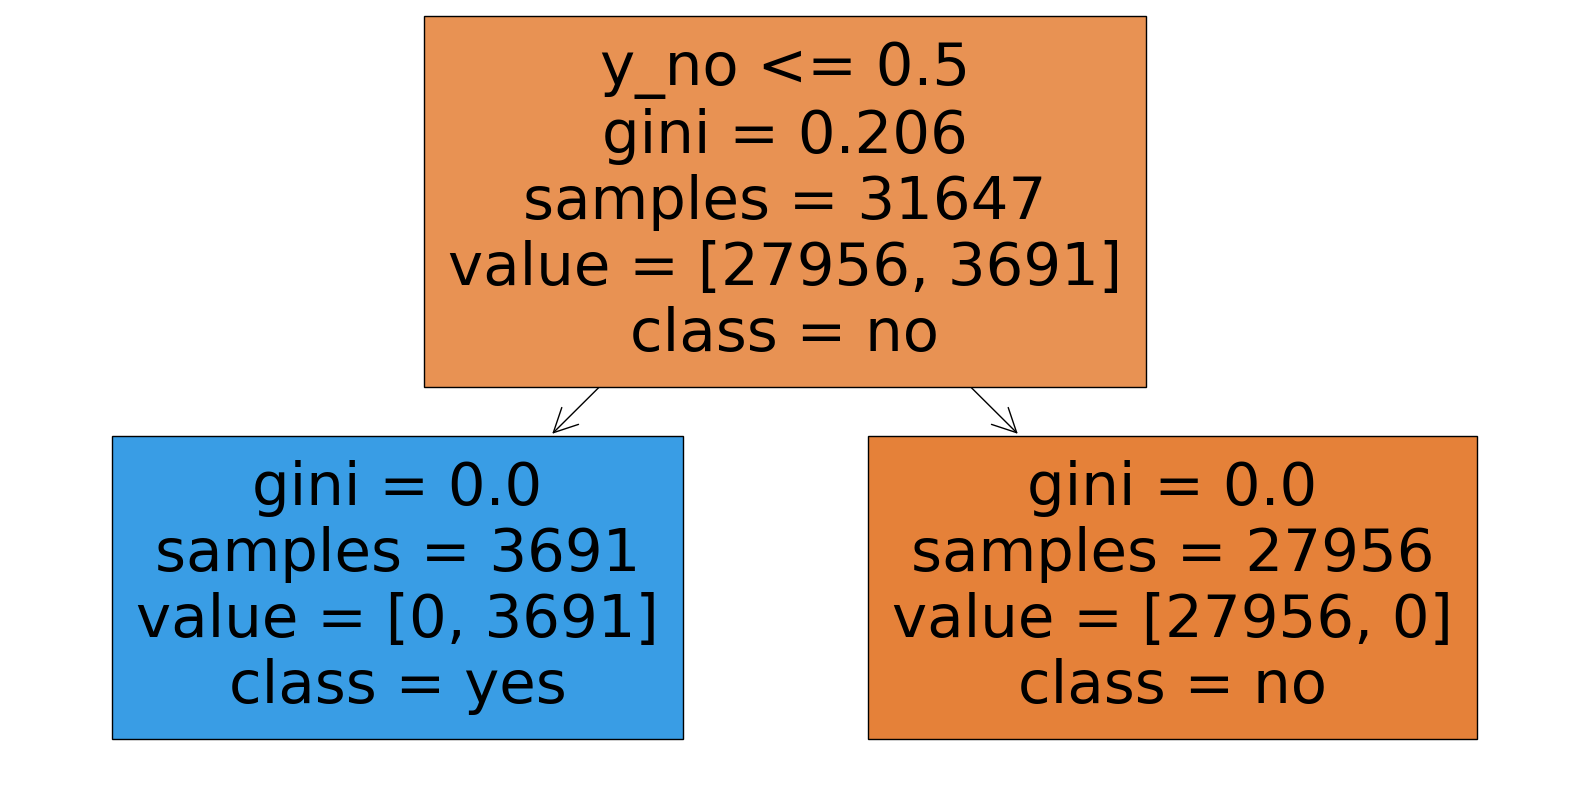

In [ ]:
# 1)Classifythedatawithadecisiontreeclassifier:
#Defining the hyperparameters to search
param_grid = {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]}

# Initializing the decision tree classifier
dt_clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10)

# Training the model with the training data
dt_clf.fit(X_train, y_train)

# Getting the best decision tree model
best_dt = dt_clf.best_estimator_

print("best hyperparameters found:")
print(dt_clf.best_params_)
# Graphing the best Decision Tree
plt.figure(figsize=(20,10))
plot_tree(best_dt, feature_names=X.columns.tolist(), class_names=['no', 'yes'], filled=True)
plt.show()


In [ ]:
# 2) Clasificación con Perceptrón Multicapa (MLP)
param_grid_mlp = {
    'hidden_layer_sizes': [(100,)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001],
    'learning_rate': ['adaptive'],
    'max_iter': [2000],
    'tol': [0.00001]
}
mlp_clf = GridSearchCV(MLPClassifier(random_state=42, verbose=True), param_grid_mlp, cv=3)
mlp_clf.fit(X_train, y_train)
best_mlp = mlp_clf.best_estimator_
best_mlp

Iteration 1, loss = 1.46173543
Iteration 2, loss = 0.49354670
Iteration 3, loss = 0.46949091
Iteration 4, loss = 0.37151835
Iteration 5, loss = 0.43069236
Iteration 6, loss = 0.33193358
Iteration 7, loss = 0.26826376
Iteration 8, loss = 0.58400694
Iteration 9, loss = 0.38207070
Iteration 10, loss = 0.29463498
Iteration 11, loss = 0.16701356
Iteration 12, loss = 0.33531139
Iteration 13, loss = 0.31210337
Iteration 14, loss = 0.25962221
Iteration 15, loss = 0.27990384
Iteration 16, loss = 0.18881668
Iteration 17, loss = 0.26992588
Iteration 18, loss = 0.29783449
Iteration 19, loss = 0.27606989
Iteration 20, loss = 0.16066282
Iteration 21, loss = 0.20054771
Iteration 22, loss = 0.24741778
Iteration 23, loss = 0.19314633
Iteration 24, loss = 0.28811375
Iteration 25, loss = 0.08776208
Iteration 26, loss = 0.18082496
Iteration 27, loss = 0.15961367
Iteration 28, loss = 0.08814156
Iteration 29, loss = 0.06956898
Iteration 30, loss = 0.15855605
Iteration 31, loss = 0.09040857
Iteration 32, los

MLPClassifier(learning_rate='adaptive', max_iter=2000, random_state=42,
              tol=1e-05, verbose=True)

Iteration 1, loss = 1.15353452
Iteration 2, loss = 0.54975721
Iteration 3, loss = 0.45718700
Iteration 4, loss = 0.50638969
Iteration 5, loss = 0.47345698
Iteration 6, loss = 0.35870691
Iteration 7, loss = 0.26555244
Iteration 8, loss = 0.31911645
Iteration 9, loss = 0.16282446
Iteration 10, loss = 0.15131378
Iteration 11, loss = 0.26081526
Iteration 12, loss = 0.26660504
Iteration 13, loss = 0.16730876
Iteration 14, loss = 0.23244623
Iteration 15, loss = 0.21446625
Iteration 16, loss = 0.09720502
Iteration 17, loss = 0.23082294
Iteration 18, loss = 0.23730406
Iteration 19, loss = 0.25956599
Iteration 20, loss = 0.24120754
Iteration 21, loss = 0.13389620
Iteration 22, loss = 0.24710451
Iteration 23, loss = 0.04718828
Iteration 24, loss = 0.16991773
Iteration 25, loss = 0.27191060
Iteration 26, loss = 0.13083554
Iteration 27, loss = 0.18079063
Iteration 28, loss = 0.09962202
Iteration 29, loss = 0.13020136
Iteration 30, loss = 0.15576969
Iteration 31, loss = 0.21476947
Iteration 32, los

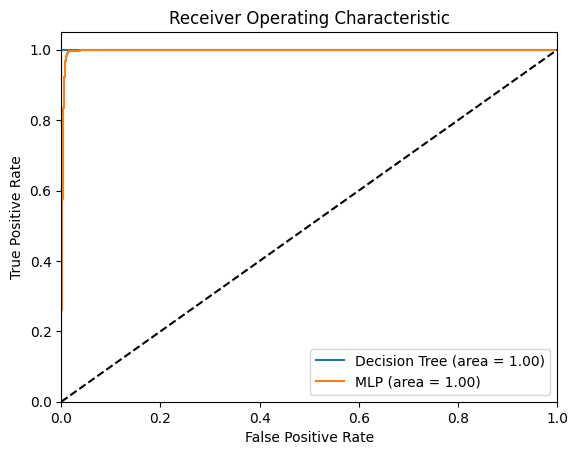

In [ ]:
# 3) Comparar rendimiento de clasificadores
kf = KFold(n_splits=10, shuffle=True, random_state=42)
dt_scores = cross_val_score(best_dt, X, y, cv=kf)
mlp_scores = cross_val_score(best_mlp, X, y, cv=kf)

print(f"Decision Tree Accuracy: {dt_scores.mean()}")
print(f"MLP Accuracy: {mlp_scores.mean()}")

# Reporte de rendimiento
dt_y_pred = best_dt.predict(X_test)
mlp_y_pred = best_mlp.predict(X_test)
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_y_pred))
print("MLP Classification Report:")
print(classification_report(y_test, mlp_y_pred))

# Curvas ROC
dt_y_proba = best_dt.predict_proba(X_test)[:,1]
mlp_y_proba = best_mlp.predict_proba(X_test)[:,1]

dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_y_proba)
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, mlp_y_proba)

plt.figure()
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % auc(dt_fpr, dt_tpr))
plt.plot(mlp_fpr, mlp_tpr, label='MLP (area = %0.2f)' % auc(mlp_fpr, mlp_tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()